In [1]:
import matplotlib.pyplot as plt
import subprocess
import numpy as np
import pickle
import torch

%matplotlib inline

In [2]:
import seaborn as sns
sns.set_palette('bright')
cols = sns.color_palette('bright')

In [3]:
with open('../saved-experiments/resnet_width_logs.pkl', 'rb') as handle:
    plotting_dict = pickle.load(handle)

In [4]:
output_ordering = np.array(plotting_dict['logs_order'])
output_log = plotting_dict['logs']
hessian_eff_dim_list = plotting_dict['hessian_eff_dim']
xaxis = plotting_dict['xaxis']

In [5]:
resnet_path_norms = torch.load("../experiments/gen-bounds/resnet_path_norms.pt")
std_path_norm = (resnet_path_norms - resnet_path_norms.mean()).div(resnet_path_norms.std())

resnet_sigma_norms = torch.load("../experiments/gen-bounds/sigma_norms_resnets.pt")
std_sigma_norm = (resnet_sigma_norms - resnet_sigma_norms.mean()).div(resnet_sigma_norms.std())

In [6]:
std_ED = (hessian_eff_dim_list - hessian_eff_dim_list.mean())/hessian_eff_dim_list.std()

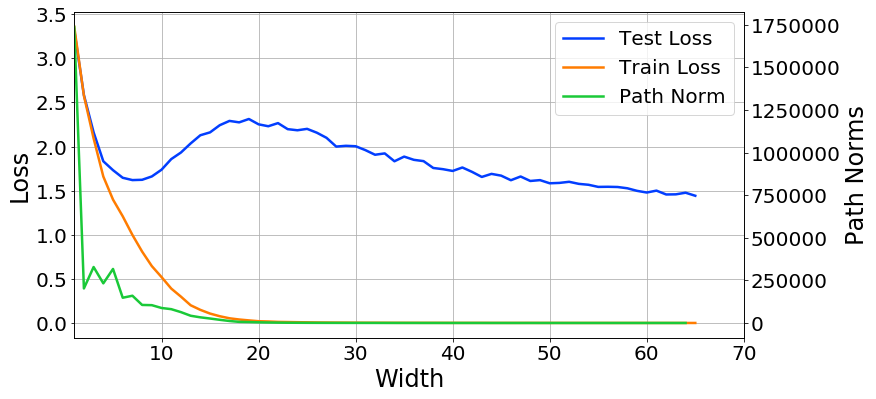

In [10]:
tick_size = 20
ax_fs = 24
leg_fs = 20
lw = 2.5

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(output_ordering[np.argsort(output_ordering)], output_log[np.argsort(output_ordering),4], 
         label = 'Test Loss', color = cols[0], linewidth=lw)
ax.plot(output_ordering[np.argsort(output_ordering)], output_log[np.argsort(output_ordering),2], 
         label = 'Train Loss', color=cols[1], linewidth=lw)

# ax.plot(resnet_path_norms, label="Path Norms", color=cols[3])
#ax.legend()


ax.set_xlabel('Width', fontsize=ax_fs)
ax.set_ylabel('Loss', fontsize=ax_fs)
ax.tick_params('both', labelsize=tick_size)

ax2 = ax.twinx()
# ax2.plot(xaxis, std_ED, label = r'$N_{eff}$(Hessian) (std)',
#         color=cols[2], linewidth=lw)

ax2.plot(resnet_path_norms, label = 'Path Norm',
        color=cols[2], linewidth=lw)


lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(loc='upper right',handles=lines + lines2, labels=labels + labels2, fontsize=leg_fs)
ax2.set_ylabel(r'Path Norms', fontsize=ax_fs)
ax2.tick_params('y', labelsize=tick_size)
ax.set_xlim(1, 70)
# ax2.semilogy()
ax.grid()
plt.show()
# plt.savefig('./dnn_double_descent.pdf', bbox_inches='tight')

In [12]:
xs = output_ordering[np.argsort(output_ordering)]
test_loss = output_log[np.argsort(output_ordering),4]
train_loss = output_log[np.argsort(output_ordering),2]
gen_gap = test_loss - train_loss

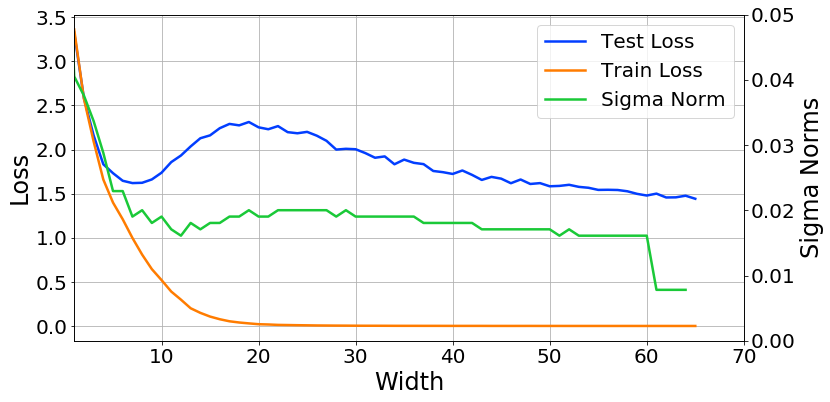

In [17]:
tick_size = 20
ax_fs = 24
leg_fs = 20
lw = 2.5

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(output_ordering[np.argsort(output_ordering)], output_log[np.argsort(output_ordering),4], 
         label = 'Test Loss', color = cols[0], linewidth=lw)
ax.plot(output_ordering[np.argsort(output_ordering)], output_log[np.argsort(output_ordering),2], 
         label = 'Train Loss', color=cols[1], linewidth=lw)

# ax.plot(resnet_path_norms, label="Path Norms", color=cols[3])
#ax.legend()


ax.set_xlabel('Width', fontsize=ax_fs)
ax.set_ylabel('Loss', fontsize=ax_fs)
ax.tick_params('both', labelsize=tick_size)

ax2 = ax.twinx()
# ax2.plot(xaxis, std_ED, label = r'$N_{eff}$(Hessian) (std)',
#         color=cols[2], linewidth=lw)

ax2.plot(resnet_sigma_norms, label = 'Sigma Norm',
        color=cols[2], linewidth=lw)


lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(loc='upper right',handles=lines + lines2, labels=labels + labels2, fontsize=leg_fs)
ax2.set_ylabel(r'Sigma Norms', fontsize=ax_fs)
ax2.tick_params('y', labelsize=tick_size)
ax.set_xlim(1, 70)
ax2.set_ylim(0, 0.05)
ax.grid()
plt.show()
# plt.savefig('./dnn_double_descent.pdf', bbox_inches='tight')

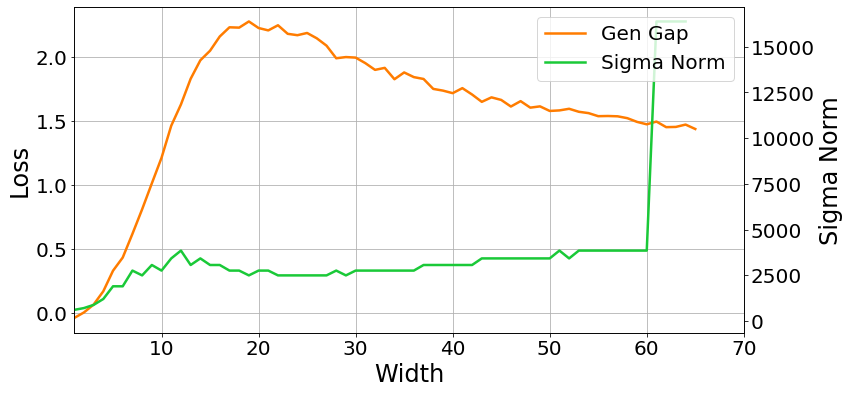

In [18]:
tick_size = 20
ax_fs = 24
leg_fs = 20
lw = 2.5

fig, ax = plt.subplots(figsize=(12,6))
# ax.plot(output_ordering[np.argsort(output_ordering)], output_log[np.argsort(output_ordering),4], 
#          label = 'Test Loss', color = cols[0], linewidth=lw)
# ax.plot(output_ordering[np.argsort(output_ordering)], output_log[np.argsort(output_ordering),2], 
#          label = 'Train Loss', color=cols[1], linewidth=lw)
ax.plot(xs, gen_gap, 
         label = 'Gen Gap', color=cols[1], linewidth=lw)

# ax.plot(resnet_path_norms, label="Path Norms", color=cols[3])
#ax.legend()


ax.set_xlabel('Width', fontsize=ax_fs)
ax.set_ylabel('Loss', fontsize=ax_fs)
ax.tick_params('both', labelsize=tick_size)

ax2 = ax.twinx()
# ax2.plot(xaxis, std_ED, label = r'$N_{eff}$(Hessian) (std)',
#         color=cols[2], linewidth=lw)

ax2.plot(1/(resnet_sigma_norms.pow(2)), label = 'Sigma Norm',
        color=cols[2], linewidth=lw)


lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(loc='upper right',handles=lines + lines2, labels=labels + labels2, fontsize=leg_fs)
ax2.set_ylabel(r'Sigma Norm', fontsize=ax_fs)
ax2.tick_params('y', labelsize=tick_size)
ax.set_xlim(1, 70)
# ax2.semilogy()
ax.grid()
plt.show()
# plt.savefig('./dnn_double_descent.pdf', bbox_inches='tight')

In [8]:
resnet_sigma_norms

tensor([0.0776, 0.0405, 0.0376, 0.0337, 0.0288, 0.0229, 0.0229, 0.0190, 0.0200,
        0.0181, 0.0190, 0.0171, 0.0161, 0.0181, 0.0171, 0.0181, 0.0181, 0.0190,
        0.0190, 0.0200, 0.0190, 0.0190, 0.0200, 0.0200, 0.0200, 0.0200, 0.0200,
        0.0200, 0.0190, 0.0200, 0.0190, 0.0190, 0.0190, 0.0190, 0.0190, 0.0190,
        0.0190, 0.0181, 0.0181, 0.0181, 0.0181, 0.0181, 0.0181, 0.0171, 0.0171,
        0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0161, 0.0171, 0.0161,
        0.0161, 0.0161, 0.0161, 0.0161, 0.0161, 0.0161, 0.0161, 0.0078, 0.0078,
        0.0078, 0.0078])